In [3]:
import pandas as pd
file_path='train_data.csv'
df = pd.read_csv(file_path)



In [6]:
df.head
!pip install -U scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Saurabh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [4]:
!pip install -U scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Saurabh\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [8]:
label_encoder = LabelEncoder()
df['condition'] = label_encoder.fit_transform(df['condition'])

In [14]:
import numpy as np

class RandomForestRegressorScratch:
    def __init__(self, n_trees=100, max_depth=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_trees):
            indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            X_bootstrap = X.iloc[indices]
            y_bootstrap = y.iloc[indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.mean(predictions, axis=1)


In [26]:
X = df.drop(['HR', 'uuid'], axis=1)


In [27]:
y = df['HR']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [30]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test)


In [32]:
y_pred_rf

array([ 61.23316213,  58.23293236,  82.38108669,  80.56442763,
        64.85945682,  83.47093712,  82.02390064,  88.42527392,
        64.40158922,  82.77018093,  64.54414081,  81.32195277,
        72.92181219,  81.63370611,  68.2952658 ,  86.70250566,
        76.59409395,  69.39989111,  69.78083499,  80.10920901,
        71.8553332 ,  60.86323081,  83.52366964,  62.63885795,
        63.49100563,  58.59207568,  76.49377112,  82.05531772,
        67.23863114,  77.94725221,  83.73447963,  67.08457552,
        65.20857381,  93.39103301,  70.01210489,  96.11627186,
        68.90762773,  64.07347363,  82.79633003,  78.20075447,
        94.25459595,  77.04906188,  82.47534761,  86.91716542,
        77.22798685,  68.97359625,  68.27028023,  70.69941457,
        76.8639729 ,  77.20307082,  76.98572807,  64.49075325,
        54.42585991,  69.25705079,  77.03379658,  80.29121225,
        74.01635739,  64.13137334,  65.87478953,  70.1103093 ,
        57.75024437,  61.79251186,  67.80916461,  69.23

In [33]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.14265282213612074
R-squared (Random Forest): 0.9986741906792259


In [35]:

### Now predictions 

test_data = pd.read_csv('test_data.csv')
label_encoder = LabelEncoder()
test_data['condition'] = label_encoder.fit_transform(test_data['condition'])
test_data_processed = test_data.drop(['uuid'], axis=1)
predictions = rf_model.predict(test_data_processed)
# test_data['Predicted_HR'] = predictions
# test_data.to_csv('sample_output_generated1.csv', index=False)

output_data = pd.DataFrame({'uuid': test_data['uuid'], 'Predicted_HR': predictions})
output_data.to_csv('results.csv', index=False)



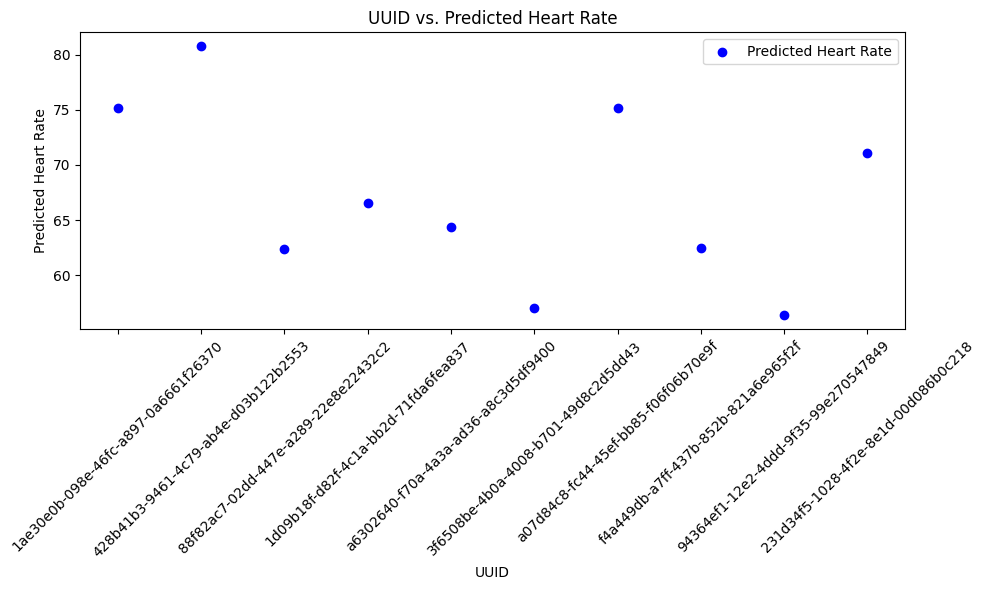

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'predicted_data' is a DataFrame containing 'uuid' and 'Predicted_HR'
predicted_data = pd.read_csv('sample_output_generated1.csv')

# Plotting 'uuid' vs. 'Predicted_HR'
plt.figure(figsize=(10, 6))
plt.scatter(predicted_data['uuid'], predicted_data['Predicted_HR'], color='blue', label='Predicted Heart Rate')
plt.title('UUID vs. Predicted Heart Rate')
plt.xlabel('UUID')
plt.ylabel('Predicted Heart Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


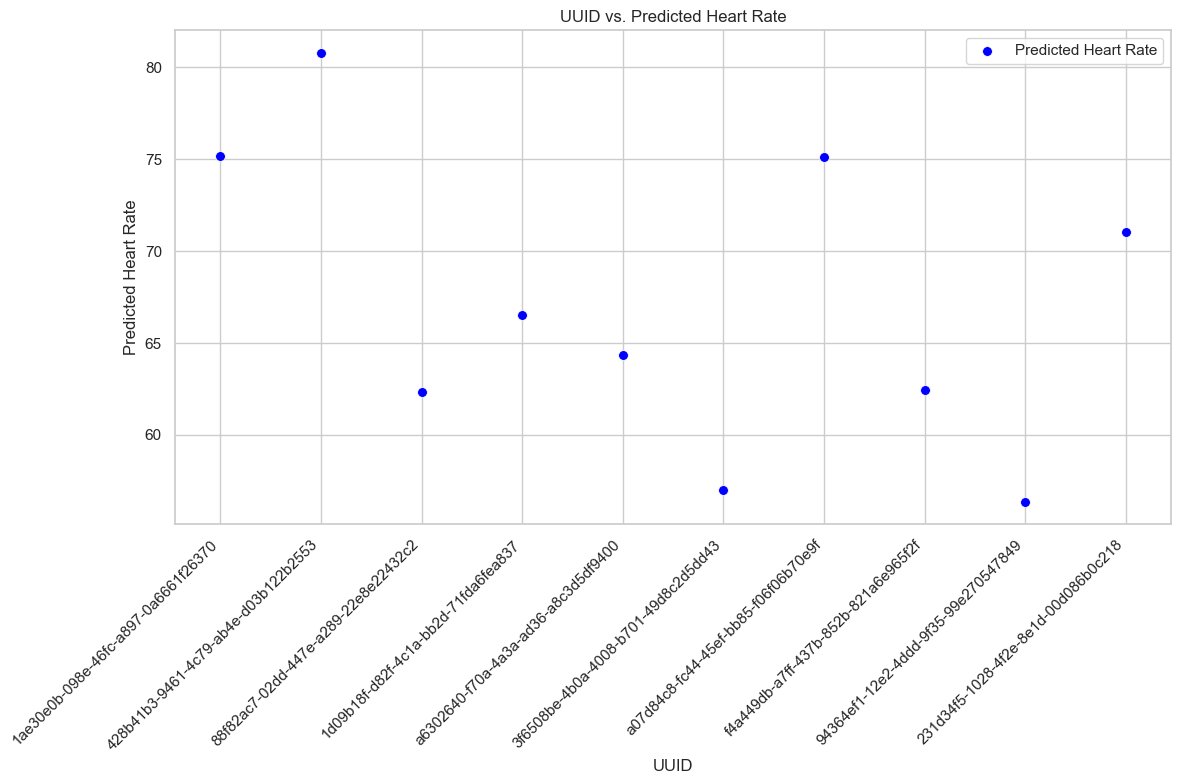

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

predicted_data = pd.read_csv('sample_output_generated1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='uuid', y='Predicted_HR', data=predicted_data, color='blue', label='Predicted Heart Rate', s=50)

# Customize the plot
plt.title('UUID vs. Predicted Heart Rate')
plt.xlabel('UUID')
plt.ylabel('Predicted Heart Rate')
plt.xticks(rotation=45, ha='right')
plt.savefig('results.jpg')
# Show the plot
plt.tight_layout()
plt.show()
